In [62]:
import numpy
%matplotlib nbagg
from matplotlib import pyplot
from tqdm import tqdm, tnrange

import aotools
from aotools.turbulence import infinitephasescreen_fried

# Test the Zernike power spectrum of the infinite phase screen

In [127]:
n_zerns = 100
nx_size = 128
pxl_scale = 8./nx_size
r0 = 0.2
L0 = 20.
stencil_length_factor = 8

n_scrns = 10000

n_tests = 16
wind_speed = 10 #m/s - just arbitrarily set
time_step = pxl_scale/wind_speed # This is timestep, as one pixel added on each iteration

# Create arrary of zernikes
print("Make Zernikes...")
Zs = aotools.zernikeArray(n_zerns, nx_size")

print("Init phase screen")
phase_screen = infinitephasescreen_fried.PhaseScreen(nx_size, pxl_scale, r0, L0, stencil_length_factor=stencil_length_factor)

print("Total Stencil Size: {}m".format(stencil_length_factor*phase_screen.nx_size * pxl_scale))

print("Run tests")
z_coeffs = numpy.zeros((n_tests, n_scrns, n_zerns))
# fig = pyplot.figure()

for n in tnrange(n_tests):
    for i in tnrange(n_scrns):
        
        # Go in all directions
        phase_screen.addRow()
        if n%4 == 0:
            scrn = phase_screen.scrn
        elif n%4 == 1:
            scrn = phase_screen.scrn.T
        elif n%4 == 2:
            scrn = phase_screen.scrn[::-1]
        else:
            scrn = phase_screen.scrn.T[::-1]
            
        z_coeffs[n, i] = (scrn * Zs).sum((-1, -2))/(nx_size**2)
    
#         pyplot.cla()
#         pyplot.imshow(scrn)
#         fig.canvas.draw()
    
z_vars = z_coeffs.var(1)


Make Zernikes...
Init phase screen
New size: 129
Total Stencil Size: 64.5m
Run tests



Exception in thread Thread-44:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tqdm\_tqdm.py", line 103, in run
    for instance in self.tqdm_cls._instances:
  File "C:\ProgramData\Anaconda3\lib\_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



<IPython.core.display.Javascript object>


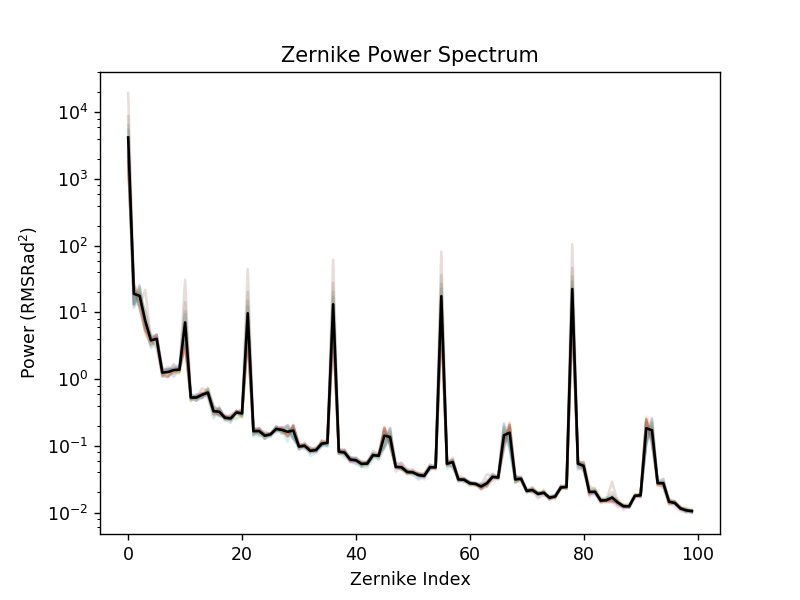

In [128]:
pyplot.figure()
pyplot.semilogy(z_vars.T, alpha=0.2)
pyplot.semilogy(z_vars.mean(0), color="k")
pyplot.title("Zernike Power Spectrum")
pyplot.xlabel("Zernike Index")
pyplot.ylabel("Power ($\mathrm{RMS Rad}^2$)")

<IPython.core.display.Javascript object>


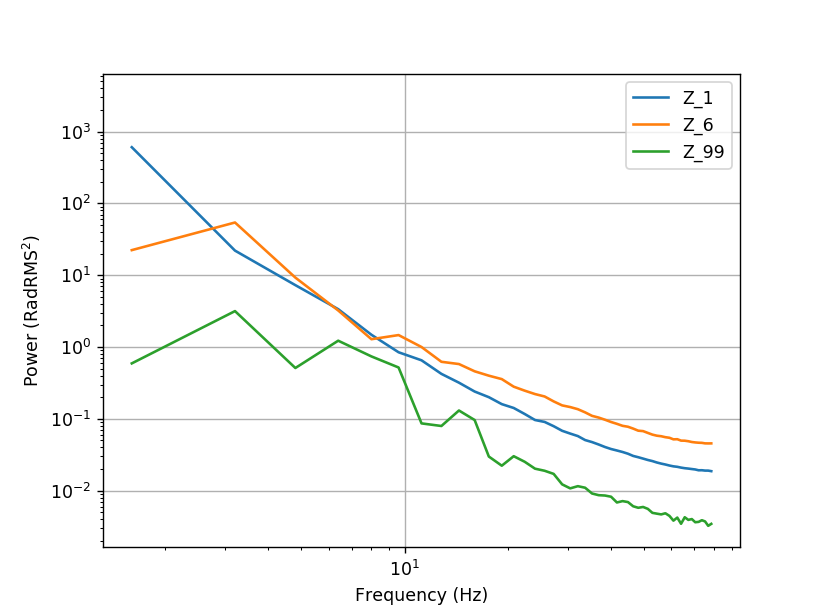

plot Z1
plot Z6
plot Z99


In [117]:
pyplot.figure()
plot_zs = [1, 6, 99]
for i, z in enumerate(plot_zs):
    print("plot Z{}".format(z))
    zn_coeffs = z_coeffs.mean(0)[:, z]
    z_ps = abs(numpy.fft.fft(zn_coeffs))**2
    x_vals = numpy.fft.fftfreq(len(z_ps), d=time_step)
    pyplot.loglog(x_vals[:n_scrns//2], z_ps[:n_scrns//2], label="Z_{}".format(z))
    pyplot.xlabel("Frequency (Hz)")
    pyplot.ylabel("Power ($\mathrm{Rad RMS}^2$)")
    pyplot.grid()
pyplot.legend()

<IPython.core.display.Javascript object>


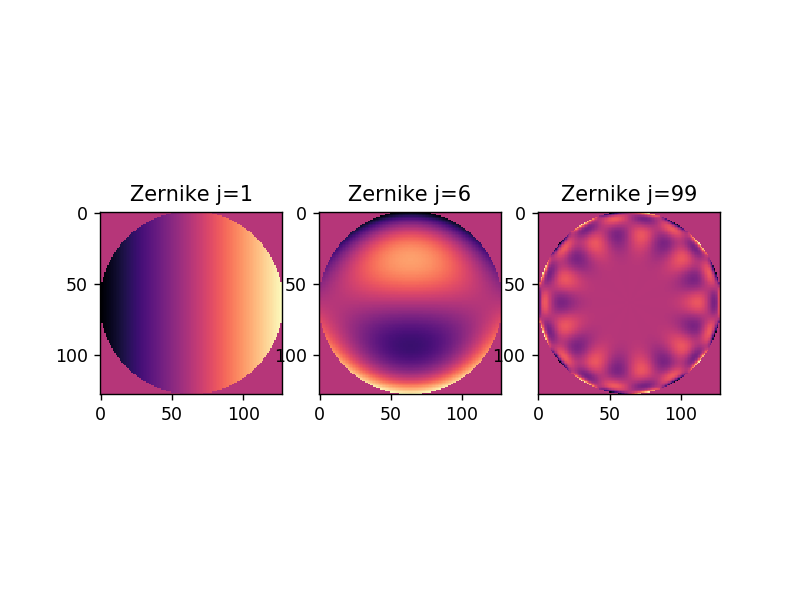

In [99]:
pyplot.figure()
for i, z in enumerate(plot_zs):
    pyplot.subplot(1, len(plot_zs), i+1)
    pyplot.imshow(Zs[z])
    pyplot.title("Zernike j={}".format(z))